## 1.import dataset

In [75]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv('data.csv', encoding='ISO-8859-1')
df.head()


C:\Users\ASUS\AppData\Local\Temp/ipykernel_13256/800778127.py:4: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('data.csv', encoding='ISO-8859-1')


,stn_code,sampling_date,state,location,agency,type,so2,no2,rspm,spm,location_monitoring_station,pm2_5,date
0,150.0,February - M021990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",4.8,17.4,NaN,NaN,NaN,NaN,1990-02-01
1,151.0,February - M021990,Andhra Pradesh,Hyderabad,NaN,Industrial Area,3.1,7.0,NaN,NaN,NaN,NaN,1990-02-01
2,152.0,February - M021990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",6.2,28.5,NaN,NaN,NaN,NaN,1990-02-01
3,150.0,March - M031990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",6.3,14.7,NaN,NaN,NaN,NaN,1990-03-01
4,151.0,March - M031990,Andhra Pradesh,Hyderabad,NaN,Industrial Area,4.7,7.5,NaN,NaN,NaN,NaN,1990-03-01


## 2. EDA

In [76]:
df.drop(columns=['stn_code', 'agency'], inplace=True)
df.fillna(0, inplace=True)
df.head()

,sampling_date,state,location,type,so2,no2,rspm,spm,location_monitoring_station,pm2_5,date
0,February - M021990,Andhra Pradesh,Hyderabad,"Residential, Rural and other Areas",4.8,17.4,0.0,0.0,0,0.0,1990-02-01
1,February - M021990,Andhra Pradesh,Hyderabad,Industrial Area,3.1,7.0,0.0,0.0,0,0.0,1990-02-01
2,February - M021990,Andhra Pradesh,Hyderabad,"Residential, Rural and other Areas",6.2,28.5,0.0,0.0,0,0.0,1990-02-01
3,March - M031990,Andhra Pradesh,Hyderabad,"Residential, Rural and other Areas",6.3,14.7,0.0,0.0,0,0.0,1990-03-01
4,March - M031990,Andhra Pradesh,Hyderabad,Industrial Area,4.7,7.5,0.0,0.0,0,0.0,1990-03-01


### summarize features

In [77]:
# Unique counts
state_count = df['state'].nunique()
location_count = df['location'].nunique()
date_count = df['date'].nunique()
type_count = df['type'].nunique()

print(f"Unique States: {state_count}")
print(f"Unique Locations: {location_count}")
print(f"Unique Dates: {date_count}")
print(f"Unique Types: {type_count}")


Unique States: 37
Unique Locations: 305
Unique Dates: 5068
Unique Types: 11


In [78]:
# Count occurrences
state_summary = df['state'].value_counts()
location_summary = df['location'].value_counts()
date_summary = df['date'].value_counts()
type_summary = df['type'].value_counts()

print(state_summary.head())  # Top 5 states
print(location_summary.head())  # Top 5 locations
print(date_summary.head())  # Top 5 dates
print(type_summary)


state
Maharashtra       60384
Uttar Pradesh     42816
Andhra Pradesh    26368
Punjab            25634
Rajasthan         25589
Name: count, dtype: int64
location
Guwahati      9984
Hyderabad     9667
Delhi         8551
Chandigarh    8520
Jaipur        7850
Name: count, dtype: int64
date
2015-03-19    253
2015-02-12    237
2015-02-19    236
2015-11-05    235
2015-11-11    234
Name: count, dtype: int64
type
Residential, Rural and other Areas    179014
Industrial Area                        96091
Residential and others                 86791
Industrial Areas                       51747
Sensitive Area                          8980
Sensitive Areas                         5536
0                                       5393
RIRUO                                   1304
Sensitive                                495
Industrial                               233
Residential                              158
Name: count, dtype: int64


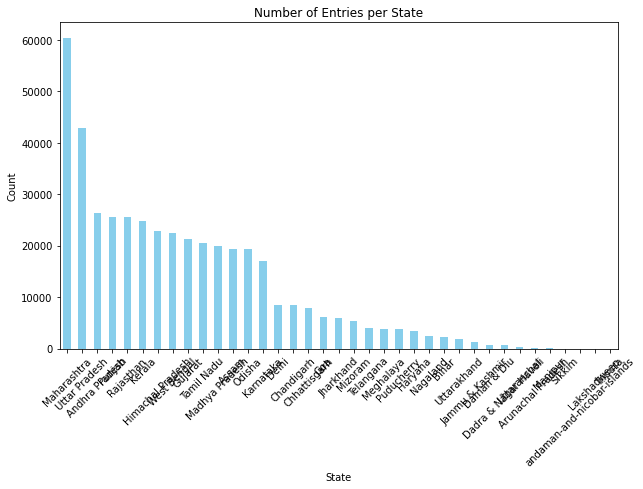

In [79]:
import matplotlib.pyplot as plt

# Bar plot for states
state_summary.plot(kind='bar', figsize=(10, 6), color='skyblue')
plt.title('Number of Entries per State')
plt.xlabel('State')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


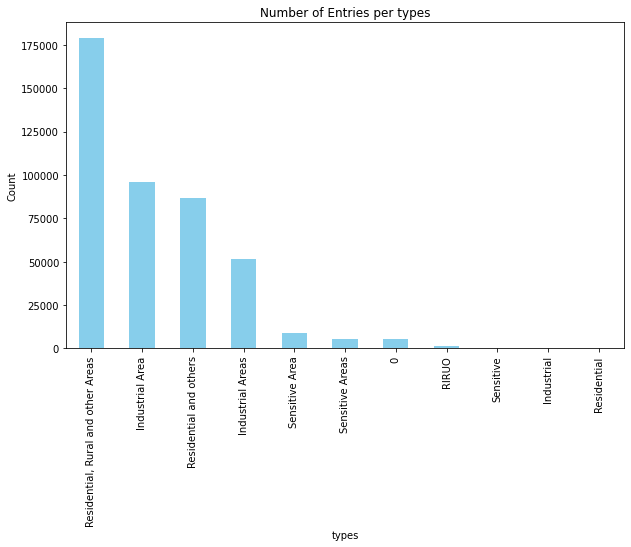

In [80]:
type_summary.plot(kind='bar', figsize=(10, 6), color='skyblue')
plt.title('Number of Entries per types')
plt.xlabel('types')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()


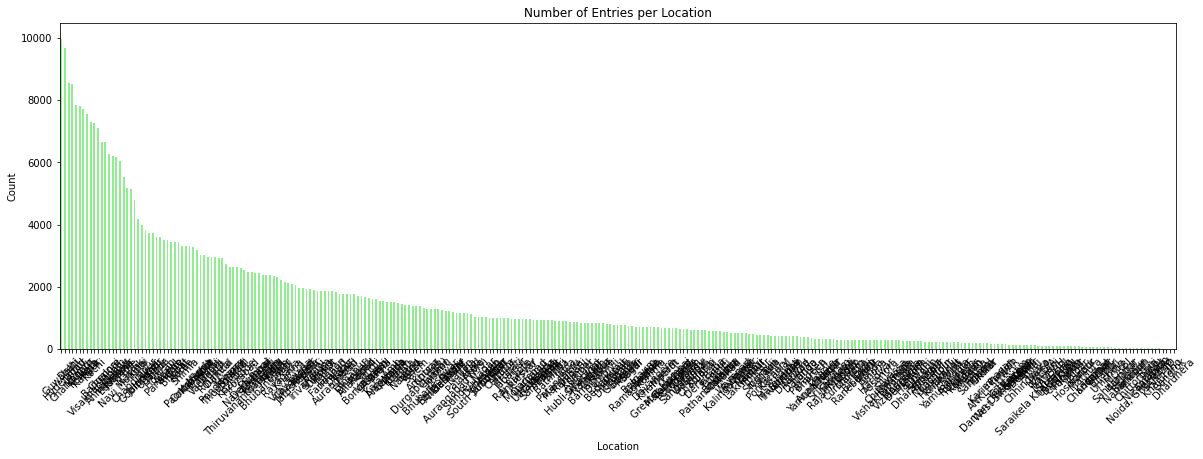

In [81]:
# Bar plot for locations
location_summary.plot(kind='bar', figsize=(20, 6), color='lightgreen')
plt.title('Number of Entries per Location')
plt.xlabel('Location')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


Report frequency by month: 
1987-01 141, 1987-02 136, 1987-03 57, 1987-04 23, 1987-05 20, 1987-06 7, 1987-07 10, 1987-08 6, 1987-09 8, 1987-10 5, 1987-11 11, 1987-12 4, 1988-01 222, 1988-02 206, 1988-03 76, 1988-04 36, 1988-05 35, 1988-06 24, 1988-07 12, 1988-08 11, 1988-09 5, 1988-10 5, 1988-11 8, 1988-12 1, 1989-01 72, 1989-02 71, 1989-03 79, 1989-04 85, 1989-05 80, 1989-06 77, 1989-07 69, 1989-08 64, 1989-09 73, 1989-10 3, 1989-12 150, 1990-01 105, 1990-02 124, 1990-03 123, 1990-04 129, 1990-05 131, 1990-06 130, 1990-07 132, 1990-08 119, 1990-09 121, 1990-10 128, 1990-11 126, 1990-12 117, 1991-01 160, 1991-02 142, 1991-03 142, 1991-04 143, 1991-05 152, 1991-06 140, 1991-07 121, 1991-08 110, 1991-09 121, 1991-10 135, 1991-11 119, 1991-12 131, 1992-01 141, 1992-02 139, 1992-03 132, 1992-04 121, 1992-05 113, 1992-06 103, 1992-07 76, 1992-08 80, 1992-09 68, 1992-10 84, 1992-11 85, 1992-12 85, 1993-01 112, 1993-02 112, 1993-03 119, 1993-04 120, 1993-05 119, 1993-06 115, 1993-07 105, 1993

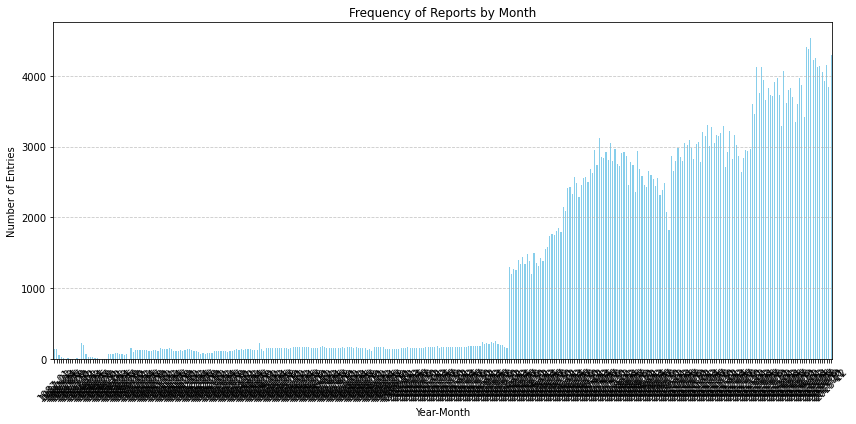

In [82]:
df['date'] = pd.to_datetime(df['date'], errors='coerce')

# Extract year and month
df['year_month'] = df['date'].dt.to_period('M')

# Count the number of reports per month
monthly_report = df['year_month'].value_counts().sort_index()

# Display the entire result on a single line
monthly_report_str = ', '.join([f"{date} {count}" for date, count in monthly_report.items()])

# Print the entire monthly report frequency as a single line
print("Report frequency by month: ")
print(monthly_report_str)

# Visualize the monthly frequency
monthly_report.plot(kind='bar', figsize=(12, 6), color='skyblue')
plt.title('Frequency of Reports by Month')
plt.xlabel('Year-Month')
plt.ylabel('Number of Entries')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

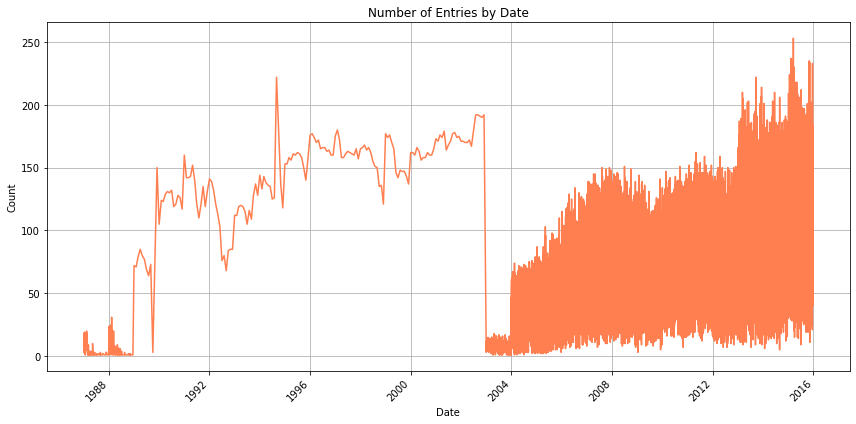

In [83]:
df['date'] = pd.to_datetime(df['date'], errors='coerce')
df = df.dropna(subset=['date'])
date_summary = df['date'].value_counts().sort_index()

date_summary.plot(kind='line', figsize=(12, 6), color='coral')
plt.title('Number of Entries by Date')
plt.xlabel('Date')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

## Calculation

In [84]:
def calculate_si(so2):
    si=0
    if (so2<=40):
     si= so2*(50/40)
    if (so2>40 and so2<=80):
     si= 50+(so2-40)*(50/40)
    if (so2>80 and so2<=380):
     si= 100+(so2-80)*(100/300)
    if (so2>380 and so2<=800):
     si= 200+(so2-380)*(100/800)
    if (so2>800 and so2<=1600):
     si= 300+(so2-800)*(100/800)
    if (so2>1600):
     si= 400+(so2-1600)*(100/800)
    return si
df['si']=df['so2'].apply(calculate_si)
df_1= df[['so2','si']]
df_1.head()

,so2,si
0,4.8,6.000
1,3.1,3.875
2,6.2,7.750
3,6.3,7.875
4,4.7,5.875


In [85]:
def calculate_ni(no2):
    ni=0
    if(no2<=40):
     ni= no2*50/40
    elif(no2>40 and no2<=80):
     ni= 50+(no2-14)*(50/40)
    elif(no2>80 and no2<=180):
     ni= 100+(no2-80)*(100/100)
    elif(no2>180 and no2<=280):
     ni= 200+(no2-180)*(100/100)
    elif(no2>280 and no2<=400):
     ni= 300+(no2-280)*(100/120)
    else:
     ni= 400+(no2-400)*(100/120)
    return ni
df['ni']=df['no2'].apply(calculate_ni)
df_1= df[['no2','ni']]
df_1.head()

,no2,ni
0,17.4,21.750
1,7.0,8.750
2,28.5,35.625
3,14.7,18.375
4,7.5,9.375


In [86]:
def calculate_rs(rspm):
    rpi=0
    if(rpi<=30):
     rpi=rpi*50/30
    elif(rpi>30 and rpi<=60):
     rpi=50+(rpi-30)*50/30
    elif(rpi>60 and rpi<=90):
     rpi=100+(rpi-60)*100/30
    elif(rpi>90 and rpi<=120):
     rpi=200+(rpi-90)*100/30
    elif(rpi>120 and rpi<=250):
     rpi=300+(rpi-120)*(100/130)
    else:
     rpi=400+(rpi-250)*(100/130)
    return rpi
df['rpi']=df['rspm'].apply(calculate_si)
df_1= df[['rspm','rpi']]
df_1.tail()

,rspm,rpi
435734,148.0,122.666667
435735,131.0,117.000000
435736,140.0,120.000000
435737,143.0,121.000000
435738,171.0,130.333333


In [87]:
def calculate_spi(spm):
    spi=0
    if(spm<=50):
     spi=spm
    if(spm<50 and spm<=100):
     spi=spm
    elif(spm>100 and spm<=250):
     spi= 100+(spm-100)*(100/150)
    elif(spm>250 and spm<=350):
     spi=200+(spm-250)
    elif(spm>350 and spm<=450):
     spi=300+(spm-350)*(100/80)
    else:
     spi=400+(spm-430)*(100/80)
    return spi
df['spi']=df['spm'].apply(calculate_spi)
df_1= df[['spm','spi']]
df_1.tail()

,spm,spi
435734,0.0,0.0
435735,0.0,0.0
435736,0.0,0.0
435737,0.0,0.0
435738,0.0,0.0


In [88]:
def calculate_aqi(si,ni,spi,rpi):
    aqi=0
    if(si>ni and si>spi and si>rpi):
     aqi=si
    if(spi>si and spi>ni and spi>rpi):
     aqi=spi
    if(ni>si and ni>spi and ni>rpi):
     aqi=ni
    if(rpi>si and rpi>ni and rpi>spi):
     aqi=rpi
    return aqi
df['AQI']=df.apply(lambda x:calculate_aqi(x['si'],x['ni'],x['spi'],x['rpi']),axis=1)
df_1= df[['sampling_date','state','si','ni','rpi','spi','AQI']]
df_1.head()

,sampling_date,state,si,ni,rpi,spi,AQI
0,February - M021990,Andhra Pradesh,6.000,21.750,0.0,0.0,21.750
1,February - M021990,Andhra Pradesh,3.875,8.750,0.0,0.0,8.750
2,February - M021990,Andhra Pradesh,7.750,35.625,0.0,0.0,35.625
3,March - M031990,Andhra Pradesh,7.875,18.375,0.0,0.0,18.375
4,March - M031990,Andhra Pradesh,5.875,9.375,0.0,0.0,9.375


## Visualization

In [92]:
dff=pd.merge(df.set_index("sampling_date"),df_1.set_index("sampling_date"), right_index=True, left_index=True).reset_index()
dff.head()

KeyboardInterrupt: 

In [72]:

df_1['date'] = pd.to_datetime(df_1['date'],format='%Y-%m-%d') # date parse
df_1['year'] = df_1['date'].dt.year # year
df_1['year'] = df_1['year'].fillna(0.0).astype(int)
data = df_1[(df_1['year']>0)]

df = data[['AQI','year','state']].groupby(["year"]).median().reset_index().sort_values(by='year',ascending=False)
f,ax=plt.subplots(figsize=(15,10))
sns.pointplot(x='year', y='AQI', data=df)

KeyError: 'date'